In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!unzip "/content/drive/MyDrive/Colab/BigDataProject/BirdSpecies20-Dataset-4000.zip"

Archive:  /content/drive/MyDrive/Colab/BigDataProject/BirdSpecies20-Dataset-4000.zip
replace birdSpecies02/predict/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_dir = '/content/birdSpecies02/train'
test_dir = '/content/birdSpecies02/test'
val_dir = '/content/birdSpecies02/valid'

In [ ]:
import os
import glob
parent_folder = train_dir
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        image_files = glob.glob(f'{folder_path}/*.jpg') + glob.glob(f'{folder_path}/*.png')
        print(f'{folder}: {len(image_files)}')

AFRICAN EMERALD CUCKOO: 194
AFRICAN OYSTER CATCHER: 195
ABBOTTS BOOBY: 220
ALBATROSS: 173
AFRICAN CROWNED CRANE: 182
AMERICAN GOLDFINCH: 166
AMERICAN FLAMINGO: 189
AMERICAN AVOCET: 219
ABYSSINIAN GROUND HORNBILL: 214
ALBERTS TOWHEE: 200
AMERICAN COOT: 193
AFRICAN FIREFINCH: 177
ABBOTTS BABBLER: 206
AMERICAN BITTERN: 210
AMERICAN KESTREL: 194
AFRICAN PYGMY GOOSE: 219
AFRICAN PIED HORNBILL: 227
ALPINE CHOUGH: 206
ALTAMIRA YELLOWTHROAT: 190
ALEXANDRINE PARAKEET: 205


AFRICAN EMERALD CUCKOO: 194
AFRICAN OYSTER CATCHER: 195
ABBOTTS BOOBY: 220
ALBATROSS: 173
AFRICAN CROWNED CRANE: 182
AMERICAN GOLDFINCH: 166
AMERICAN FLAMINGO: 189
AMERICAN AVOCET: 219
ABYSSINIAN GROUND HORNBILL: 214
ALBERTS TOWHEE: 200
AMERICAN COOT: 193
AFRICAN FIREFINCH: 177
ABBOTTS BABBLER: 206
AMERICAN BITTERN: 210
AMERICAN KESTREL: 194
AFRICAN PYGMY GOOSE: 219
AFRICAN PIED HORNBILL: 227
ALPINE CHOUGH: 206
ALTAMIRA YELLOWTHROAT: 190
ALEXANDRINE PARAKEET: 205

Mean number of images per class: 198.95


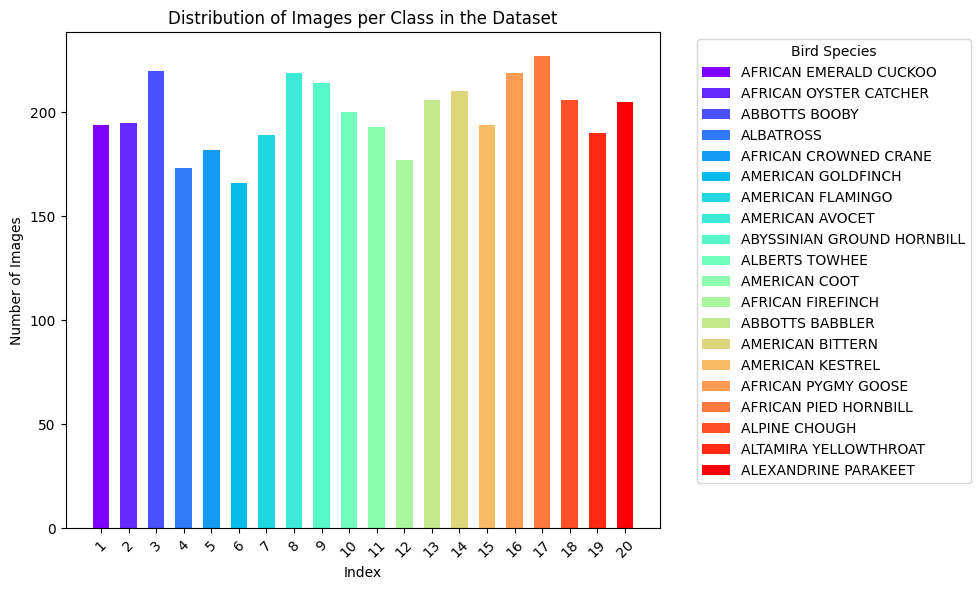

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
parent_folder = train_dir
image_counts = {}
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        image_files = glob.glob(f'{folder_path}/*.jpg') + glob.glob(f'{folder_path}/*.png')
        image_counts[folder] = len(image_files)
        print(f'{folder}: {len(image_files)}')
counts = list(image_counts.values())
mean_count = np.mean(counts)
print(f'\nMean number of images per class: {mean_count}')
num_classes = len(image_counts.keys())
colors = cm.rainbow(np.linspace(0, 1, num_classes))
class_indices = range(1, len(image_counts) + 1)
class_names = list(image_counts.keys())
plt.figure(figsize=(10, 6))
bars = plt.bar(class_indices, image_counts.values(), color=colors, width=0.6, tick_label=class_indices)
plt.xlabel('Index')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.title('Distribution of Images per Class in the Dataset')
plt.legend(bars, class_names, title="Bird Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
parent_folder = test_dir
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        image_files = glob.glob(f'{folder_path}/*.jpg') + glob.glob(f'{folder_path}/*.png')
        print(f'{folder}: {len(image_files)}')

AFRICAN EMERALD CUCKOO: 5
AFRICAN OYSTER CATCHER: 5
ABBOTTS BOOBY: 5
ALBATROSS: 5
AFRICAN CROWNED CRANE: 5
AMERICAN GOLDFINCH: 5
AMERICAN FLAMINGO: 5
AMERICAN AVOCET: 5
ABYSSINIAN GROUND HORNBILL: 5
ALBERTS TOWHEE: 5
AMERICAN COOT: 5
AFRICAN FIREFINCH: 5
ABBOTTS BABBLER: 5
AMERICAN BITTERN: 5
AMERICAN KESTREL: 5
AFRICAN PYGMY GOOSE: 5
AFRICAN PIED HORNBILL: 5
ALPINE CHOUGH: 5
ALTAMIRA YELLOWTHROAT: 5
ALEXANDRINE PARAKEET: 5


In [ ]:
parent_folder = val_dir
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        image_files = glob.glob(f'{folder_path}/*.jpg') + glob.glob(f'{folder_path}/*.png')
        print(f'{folder}: {len(image_files)}')

AFRICAN EMERALD CUCKOO: 5
AFRICAN OYSTER CATCHER: 5
ABBOTTS BOOBY: 5
ALBATROSS: 5
AFRICAN CROWNED CRANE: 5
AMERICAN GOLDFINCH: 5
AMERICAN FLAMINGO: 5
AMERICAN AVOCET: 5
ABYSSINIAN GROUND HORNBILL: 5
ALBERTS TOWHEE: 5
AMERICAN COOT: 5
AFRICAN FIREFINCH: 5
ABBOTTS BABBLER: 5
AMERICAN BITTERN: 5
AMERICAN KESTREL: 5
AFRICAN PYGMY GOOSE: 5
AFRICAN PIED HORNBILL: 5
ALPINE CHOUGH: 5
ALTAMIRA YELLOWTHROAT: 5
ALEXANDRINE PARAKEET: 5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [ ]:
class_names = sorted(os.listdir(train_dir))
print("Class names:", class_names)
len(class_names)

Class names: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']


20

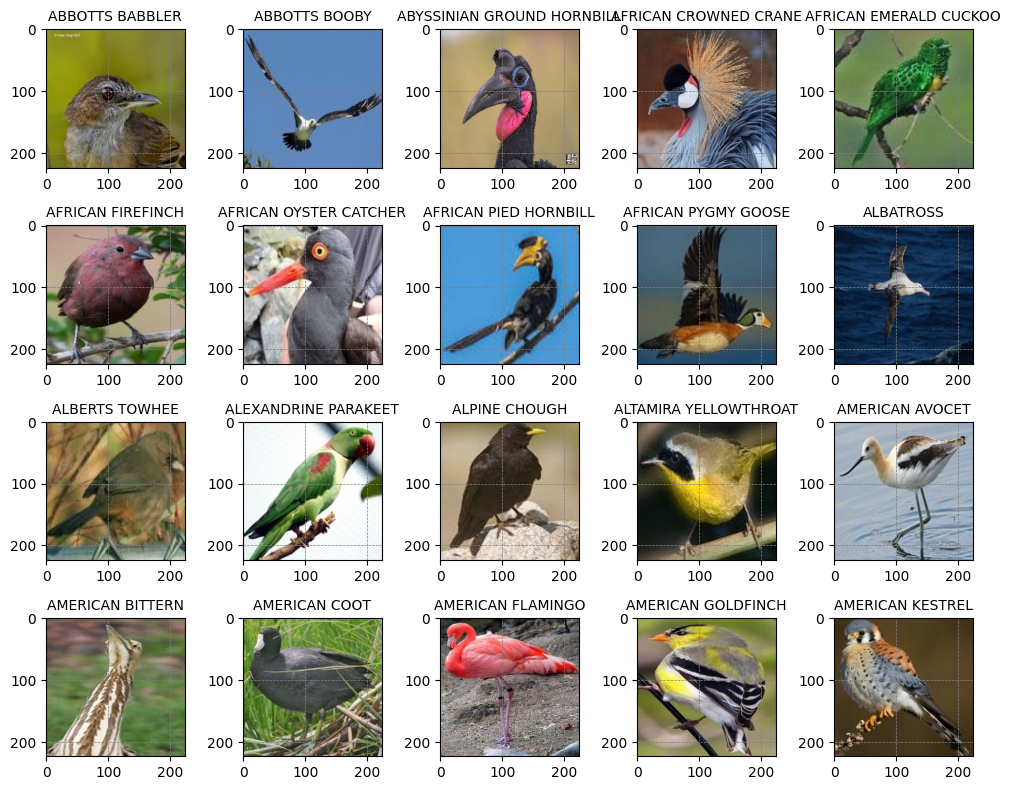

In [ ]:
def get_one_image_per_class(directory, class_names):
    images = []
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        image_name = os.listdir(class_dir)[0]
        image_path = os.path.join(class_dir, image_name)
        images.append((image_path, class_name))
    return images
class_images = get_one_image_per_class(train_dir, class_names)
plt.figure(figsize=(10, 8))
for i, (image_path, class_name) in enumerate(class_images):
    img = load_img(image_path, target_size=(224, 224))
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(class_name, fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.axis('on')
plt.tight_layout()
plt.show()

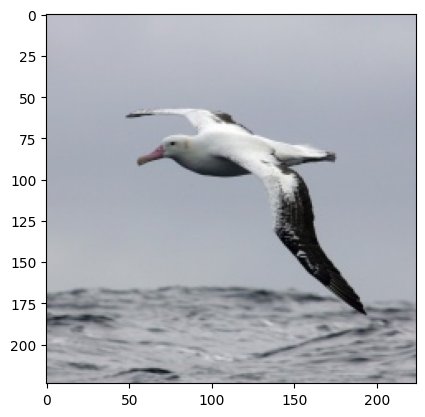

In [ ]:
pic=load_img('/content/birdSpecies02/test/ALBATROSS/1.jpg',target_size=(224,224,3))
plt.imshow(pic)

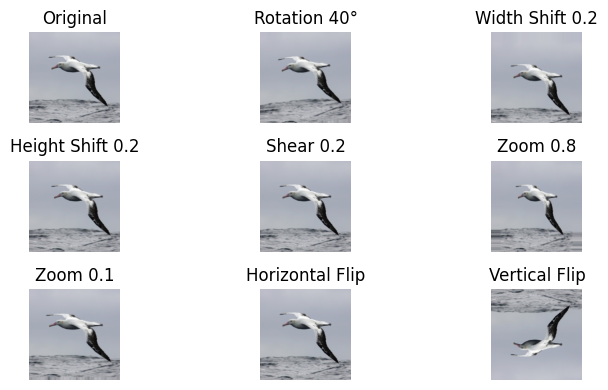

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_path = '/content/birdSpecies02/test/ALBATROSS/1.jpg'
original_img = load_img(image_path, target_size=(224, 224))
original_img = img_to_array(original_img) / 255.0
augmentations = {
    'Rotation 40°': ImageDataGenerator(rotation_range=40),
    'Width Shift 0.2': ImageDataGenerator(width_shift_range=0.2),
    'Height Shift 0.2': ImageDataGenerator(height_shift_range=0.2),
    'Shear 0.2': ImageDataGenerator(shear_range=0.2),
    'Zoom 0.8': ImageDataGenerator(zoom_range=0.8),
    'Zoom 0.1': ImageDataGenerator(zoom_range=0.1),
    'Horizontal Flip': ImageDataGenerator(horizontal_flip=True),
    'Vertical Flip': ImageDataGenerator(vertical_flip=True),
}

img = np.expand_dims(original_img, axis=0)
fig, axes = plt.subplots(3, 3, figsize=(8, 4), squeeze=False)
axes = axes.flatten()
axes[0].imshow(original_img)
axes[0].set_title('Original')
axes[0].axis('off')
for i, (name, datagen) in enumerate(augmentations.items(), start=1):
    aug_iter = datagen.flow(img, batch_size=1)
    aug_img = next(aug_iter)[0]
    axes[i].imshow(aug_img)
    axes[i].set_title(name)
    axes[i].axis('off')
plt.tight_layout()
plt.show()